# Load Dataset from Hugging Face

In [1]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

train_dataset = load_dataset("hk-kaden-kim/pix2struct-chartcaptioning", split="train")
validation_dataset = load_dataset("hk-kaden-kim/pix2struct-chartcaptioning", split="validation")
test_dataset = load_dataset("hk-kaden-kim/pix2struct-chartcaptioning", split="test")

Using custom data configuration hk-kaden-kim--pix2struct-chartcaptioning-ecaa7f59a3450332
Found cached dataset parquet (/Users/hyeongkyunkim/.cache/huggingface/datasets/hk-kaden-kim___parquet/hk-kaden-kim--pix2struct-chartcaptioning-ecaa7f59a3450332/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration hk-kaden-kim--pix2struct-chartcaptioning-ecaa7f59a3450332
Found cached dataset parquet (/Users/hyeongkyunkim/.cache/huggingface/datasets/hk-kaden-kim___parquet/hk-kaden-kim--pix2struct-chartcaptioning-ecaa7f59a3450332/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration hk-kaden-kim--pix2struct-chartcaptioning-ecaa7f59a3450332
Found cached dataset parquet (/Users/hyeongkyunkim/.cache/huggingface/datasets/hk-kaden-kim___parquet/hk-kaden-kim--pix2struct-chartcaptioning-ecaa7f59a3450332/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


## Overall

In [2]:
data = {'caption':train_dataset['caption']+validation_dataset['caption']}
info_df = pd.DataFrame(data)

Avg. caption length = 334.41284987277356


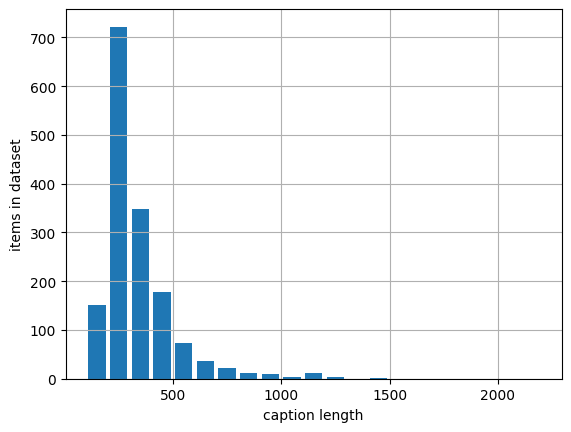

In [3]:
char_cnt_stat = info_df['caption'].str.len()
print(f"Avg. caption length = {np.average(np.array(char_cnt_stat))}")
_ = char_cnt_stat.hist(bins=np.arange(100, 2300, 100),rwidth=0.8)
_ = plt.xlabel("caption length")
_ = plt.ylabel("items in dataset")

Avg. word counts = 54.50063613231552


Text(0, 0.5, 'items in dataset')

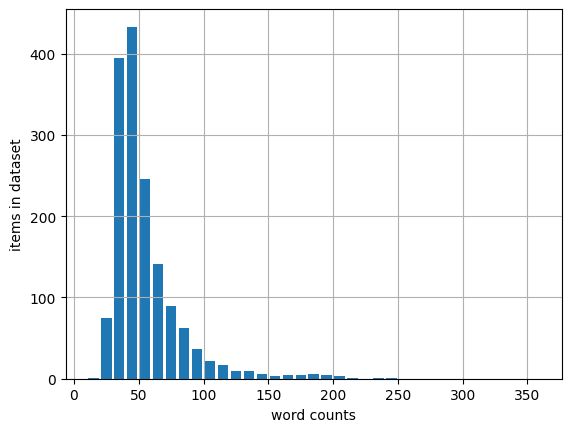

In [4]:
wrd_cnt_stat = info_df['caption'].str.split().map(lambda x: len(x))
print(f"Avg. word counts = {np.average(np.array(wrd_cnt_stat))}")
_ = wrd_cnt_stat.hist(bins=np.arange(10, 370, 10),rwidth=0.8)
plt.xlabel("word counts")
plt.ylabel("items in dataset")

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

2023-10-24 13:31:39.224102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from collections import Counter

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

# all_captions = ' '.join()
ent=info_df['caption'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

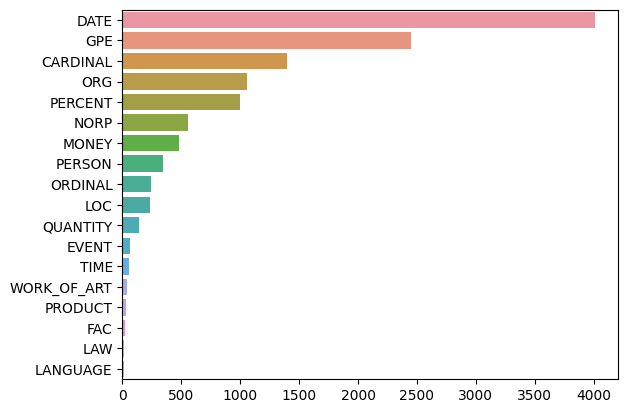

In [7]:
import seaborn as sns

x,y=map(list,zip(*count))
g = sns.barplot(x=y,y=x)
# g.set_xscale('log')

## Training Dataset Analysis

In [8]:
dataset = train_dataset

data = {'caption':dataset['caption'],
        'chartType':dataset['chartType'],
        'chartElement':dataset['chartElement'],
        'dataType':dataset['dataType'],}

info_df = pd.DataFrame(data)

In [9]:
info_df.groupby(['chartType','dataType']).count()

caption  chartElement
chartType dataType                           
bar       MultiColumn       413           413
          SingleColumn      518           518
line      MultiColumn       287           287
          SingleColumn      155           155

## Validation Dataset Analysis

In [10]:
dataset = validation_dataset

data = {'caption':dataset['caption'],
        'chartType':dataset['chartType'],
        'chartElement':dataset['chartElement'],
        'dataType':dataset['dataType'],}

info_df = pd.DataFrame(data)

In [11]:
info_df.groupby(['chartType','dataType']).count()

caption  chartElement
chartType dataType                           
bar       MultiColumn        68            68
          SingleColumn       84            84
line      MultiColumn        32            32
          SingleColumn       15            15

## Test Dataset Analysis

In [12]:
dataset = test_dataset

data = {'caption':dataset['caption'],
        'chartType':dataset['chartType'],
        'chartElement':dataset['chartElement'],
        'dataType':dataset['dataType'],}

info_df = pd.DataFrame(data)

In [13]:
info_df.groupby(['chartType','dataType','chartElement']).count()

caption
chartType dataType     chartElement         
bar       MultiColumn  OnePlot           135
                       SubPlot           135
          SingleColumn FullCover         145
                       NoAxisLabel       145
                       NoGrid            145
                       NoTitle           145
line      MultiColumn  OnePlot            65
                       SubPlot            65
          SingleColumn FullCover          55
                       NoAxisLabel        55
                       NoGrid             55
                       NoTitle            55

## 